# Task 3: Correlation between News sentiment and Stock Movement

This notebook orchestrates the end to end process of:
- Loading pre-prepared stock data and raw news data
- Performing sentiment analysis on news headlines
- Merging the news sentiment with the stock data
- Calculating technical indicators and daily returns
- Analyzing and visualizing the correlation between these features.

## Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..')))


In [ ]:
# src modules
from src.stock_data_processing import load_and_prepare_data
from src.news_data_loader import load_news_data
from src.technical_analysis import add_daily_returns, add_technical_indicators
from src.sentiment_analysis import (
    add_sentiment_score,
    prepare_daily_sentiment,
    merge_sentiment_with_stock_data
)

/home/bini/Documents/repos/Nova-financial-solutions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Files

In [3]:
# Path to yfinance data
file_path = '../data/Data'

# Path to news data
DATA_FILE_PATH = '../data/raw_analyst_ratings.csv'

## Data Loading

In [5]:
# Load news Data
news_data = load_news_data(DATA_FILE_PATH)


Loading data from ../data/raw_analyst_ratings.csv...
Data loaded and initial date cleaning complete.


In [6]:
# Load finance news Data
stock_data = load_and_prepare_data(file_path)

Data loaded and prepared successfully!
Loaded data for 6 stocks.


## Sentiment analysis

In [7]:
# Sentiment analysis workflow

# Calculate a sentiment score for each news headline
print("\n--- Performing Sentiment Analysis ---")
news_with_sentiment = add_sentiment_score(news_data)


--- Performing Sentiment Analysis ---
Calculating sentiment scores for news headlines...


Pandas Apply: 100%|██████████| 55987/55987 [00:37<00:00, 1481.26it/s] 


In [8]:
# Aggregate scores to get a single average sentiment per stock per day

daily_sentiment_df = prepare_daily_sentiment(news_with_sentiment)
print("\n--- Daily Aggregated Sentiment Head ---")
print(daily_sentiment_df.head())

Aggregating daily sentiment scores...

--- Daily Aggregated Sentiment Head ---
                   sentiment
Ticker Date                 
A      2020-05-22   0.035714
       2020-05-26   0.000000
       2020-06-03   0.000000
       2020-06-05   0.000000
AA     2020-05-18   0.062500


## Data Merging and Enrichment

In [9]:
# Data Merging and Enrichment 
print("\n--- Merging Datasets and Enriching Features ---")

# Merge the daily sentiment scores into your main stock DataFrame
combined_data = merge_sentiment_with_stock_data(stock_data, daily_sentiment_df)
print("\n--- Combined Data Head (Stock + Sentiment) ---")
print(combined_data[['Date', 'Ticker', 'Close', 'sentiment']].head())


--- Merging Datasets and Enriching Features ---
Merging sentiment data with stock data...

--- Combined Data Head (Stock + Sentiment) ---
           Date Ticker      Close  sentiment
2877 2020-06-09   AAPL  83.419868   0.088333
2878 2020-06-10   AAPL  85.566071   0.166919
2879 2020-06-11   AAPL  81.457993   0.166919
2880 2020-06-12   AAPL  82.161247   0.166919
2881 2020-06-15   AAPL  83.177345   0.166919


In [10]:
# Calculate technical indicators (from Task 2) on the newly combined data
analysis_data = add_technical_indicators(combined_data)

Calculating technical indicators...
Technical indicators added successfully.


In [11]:
# Calculate daily returns on the data that now includes all other features
final_df = add_daily_returns(analysis_data)
print("\n--- Final Data Head (With All Features) ---")
print(final_df[['Date', 'Ticker', 'sentiment', 'daily_return', 'next_day_return']].head())

Calculating daily stock returns...

--- Final Data Head (With All Features) ---
           Date Ticker  sentiment  daily_return  next_day_return
2927 2020-08-19   AAPL   0.166919      0.001255         0.022189
2928 2020-08-20   AAPL   0.166919      0.022189         0.051532
2929 2020-08-21   AAPL   0.166919      0.051532         0.011960
2930 2020-08-24   AAPL   0.166919      0.011960        -0.008204
2931 2020-08-25   AAPL   0.166919     -0.008204         0.013599


## Correlation analysis

In [13]:
print("\n\n--- Performing Correlation Analysis ---")

# Define the columns you want to include in the correlation matrix
correlation_columns = [
    'sentiment', 
    'daily_return', 
    'next_day_return', 
    'SMA_20', 
    'RSI_14', 
    'MACD'
]

# Ensure all selected columns exist in the DataFrame before calculating correlation
existing_columns = [col for col in correlation_columns if col in final_df.columns]
correlation_matrix = final_df[existing_columns].corr()

# Display the full correlation matrix
print("\n--- CORRELATION MATRIX ---")
print(correlation_matrix)



--- Performing Correlation Analysis ---

--- CORRELATION MATRIX ---
                 sentiment  daily_return  next_day_return    SMA_20    RSI_14  \
sentiment         1.000000     -0.023011        -0.022471  0.645071 -0.091572   
daily_return     -0.023011      1.000000        -0.015357 -0.043626  0.332111   
next_day_return  -0.022471     -0.015357         1.000000 -0.044174 -0.020122   
SMA_20            0.645071     -0.043626        -0.044174  1.000000 -0.071064   
RSI_14           -0.091572      0.332111        -0.020122 -0.071064  1.000000   
MACD             -0.031230      0.033511        -0.030488  0.049310  0.749015   

                     MACD  
sentiment       -0.031230  
daily_return     0.033511  
next_day_return -0.030488  
SMA_20           0.049310  
RSI_14           0.749015  
MACD             1.000000  


In [14]:
# Display the most important correlations for this task
print("\n--- Key Finding: Correlation of Sentiment with Stock Returns ---")
print(correlation_matrix.loc['sentiment', ['daily_return', 'next_day_return']])


--- Key Finding: Correlation of Sentiment with Stock Returns ---
daily_return      -0.023011
next_day_return   -0.022471
Name: sentiment, dtype: float64


## Visualization


--- Visualizing the Correlation Matrix ---


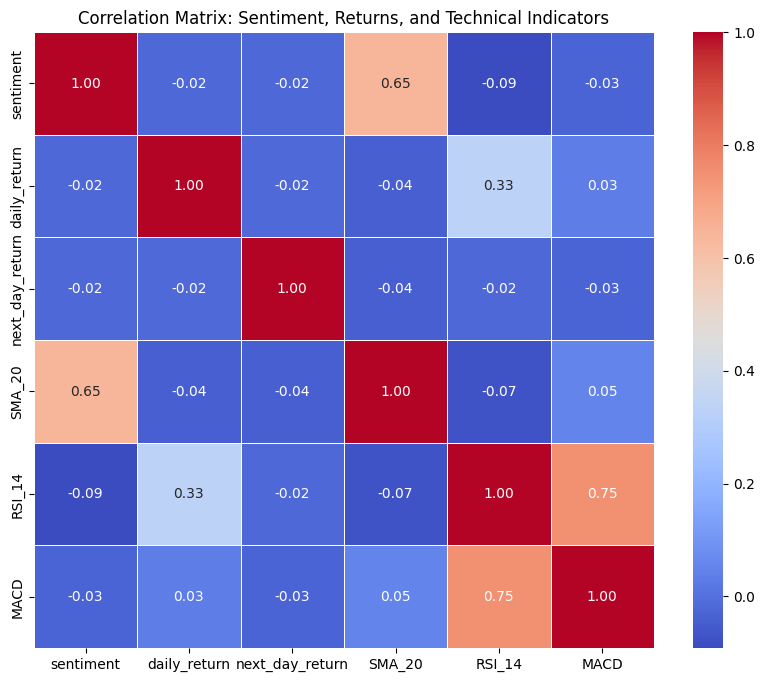

In [15]:
print("\n--- Visualizing the Correlation Matrix ---")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Sentiment, Returns, and Technical Indicators')
plt.show()